# COVID-19, Analiza eksploracyjna - badanie zmienności i powiązań między danymi z wykorzystaniem wykresów

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Uzupełniamy liczbę ludności, która posłuży do liczenia współczynników charakteryzujących pandemię.

In [52]:
# Worldometer
population = 37827088

Wczytajemy przygotowane dane z pliku.

In [53]:
df = pd.read_excel("poland_covid_formatted.xlsx", index_col = 0)
print(df.info())
df.head(7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Data                             289 non-null    datetime64[ns]
 1   Dzień pandemii                   289 non-null    int64         
 2   Nowe przypadki                   289 non-null    int64         
 3   Nowe zgony                       289 non-null    int64         
 4   Nowe wyzdrowienia                289 non-null    int64         
 5   Suma potwierdzonych przypadków   289 non-null    int64         
 6   Suma zgonów                      289 non-null    int64         
 7   Suma wyzdrowień                  289 non-null    int64         
 8   Liczba aktywnych przypadków      289 non-null    int64         
 9   Dobowa liczba wykonanych testów  289 non-null    int64         
 10  punkty restrykcji                289 non-null    int64        

,Data,Dzień pandemii,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia,Suma potwierdzonych przypadków,Suma zgonów,Suma wyzdrowień,Liczba aktywnych przypadków,Dobowa liczba wykonanych testów,punkty restrykcji
0,2020-03-03,0,0,0,0,0,0,0,0,25,380
1,2020-03-04,1,1,0,0,1,0,0,1,92,380
2,2020-03-05,2,0,0,0,1,0,0,1,179,380
3,2020-03-06,3,4,0,0,5,0,0,5,145,380
4,2020-03-07,4,1,0,0,6,0,0,6,154,380
5,2020-03-08,5,5,0,0,11,0,0,11,230,380
6,2020-03-09,6,6,0,0,17,0,0,17,246,380


Uzupełniamy model o nowe cechy - pierwsza reprezntuje procent dodatnich wyników testów w danym dniu - jest to przybliżona wartość, ponieważ w wielu przypadkach uzyskanie wyniku testu trwa nie 24h, a nawet do tygodnia, niemniej ten współczynnik "nowe przypadki/liczba testów" dobrze obrazuje to czy ilość wykonywanych testów jest adekwatna do liczny nowych zakażeń. Druga obrazuje nałożone restrykcje w skali kraju, korzystając z przelicznika: zielona strefa - 0, żółta strefa - 1, czerwona - 3. Wynik to suma punktów które odzwierciedlają stan 380 powiatów i miast z prawami powiatu w Polsce. Wartości przed wprowadzeniem stref zostały ustalone arbitralnie porównując ówczesne obostrzenia do tych z późniejszych stref. Wartości dla stref zostały również arbitralnie.

In [54]:
# dodanie kolumny z odsetkiem dodatnich wyników testów
df.loc[:,'Procent dodatnich wyników'] = df['Nowe przypadki']/df['Dobowa liczba wykonanych testów']

Generujemy opis zmienności danych w postaci zgrabnej tabelki.

In [55]:
# opis danych z tabeli
df_opis = pd.DataFrame()
df_opis.loc[:,'mean'] = df.mean(numeric_only=True)
df_opis.loc[:,'median'] = df.median(numeric_only=True)
df_opis.loc[:,'min'] = df.min()
df_opis.loc[:,'max'] = df.max()
df_opis.loc[:,'skew'] = df.skew()
df_opis

,mean,median,min,max,skew
Dzień pandemii,144.000000,144.000000,0,288,0.000000
Nowe przypadki,3936.754325,471.000000,0,27875,1.944369
Nowe zgony,82.747405,15.000000,0,674,2.334618
Nowe wyzdrowienia,3088.754325,399.000000,0,29396,2.341035
Suma potwierdzonych przypadków,177404.743945,42622.000000,0,1159705,2.081932
Suma zgonów,3549.733564,1664.000000,0,23914,2.379564
Suma wyzdrowień,101898.961938,32419.000000,0,892650,2.688711
Liczba aktywnych przypadków,71879.982699,12194.000000,0,439913,1.870060
Dobowa liczba wykonanych testów,24442.155709,22061.000000,25,82955,1.013988
punkty restrykcji,428.667820,380.000000,0,1140,0.492773


W celu sprawdzenia czy dane krajowe nie zawierają braków mogących powodować przekłamania, zliczamy je. Jak się okazuje, dane są kompletne, co pozwala na rzetelne odczytywanie wskaźników podczas ich eksploracji.

In [56]:
# pokaż braki w danych
df.isnull().sum().sum()

0

Tworzymy macierz korelacji miedzy cechami.

Text(0.5, 1, 'Macierz korelacji pomiędzy cechami')

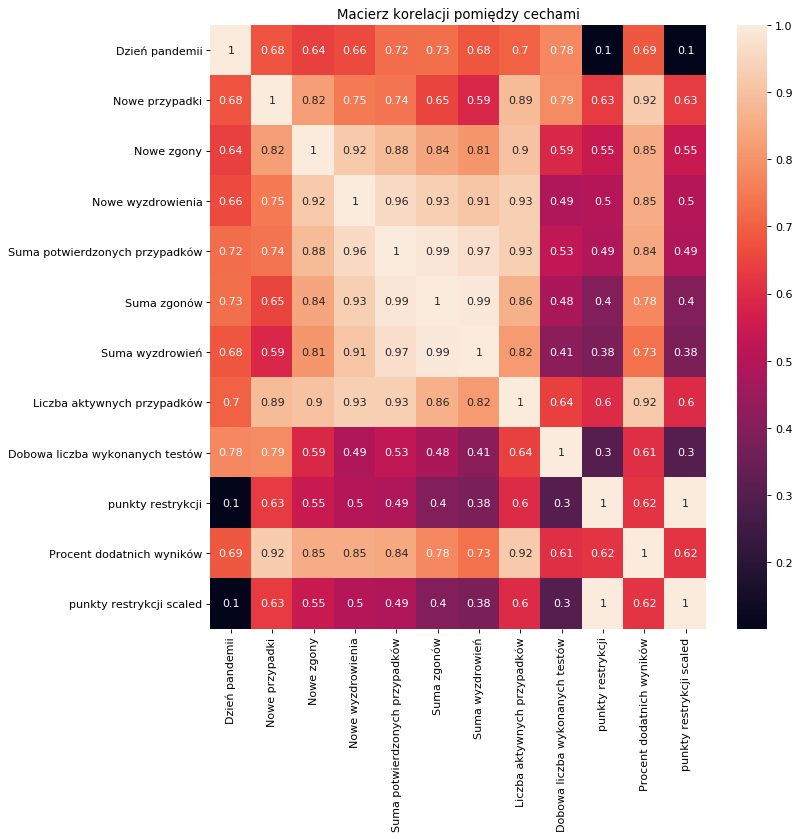

In [76]:
plt.figure(figsize=(10,10),dpi = 80)
sns.heatmap(df.corr(),annot = df.corr())
plt.title("Macierz korelacji pomiędzy cechami")

Analizując macierz korelacji pomiędzy cechami możemy dojść do wniosku, że dane są w większości dosyć silnie skorelowane (oprócz pary "punkty restrykcji"/"dobowa liczba wykonanych testów" obserwujemy współczynniki > 0.5). Najwyższa korelacja zachodzi pomiędzy liczbą aktywnych przypadków, a sumą potwierdzonych przypadków, co wskazuje na fakt, że epidemia na dobrą sprawę przez większość czasu przybierała na sile -- oczywiście, były momenty stabilizacji, jednakże stabilizacja nie była momentem powrotu do poziomu nowych przypadków sprzed wzrostów (w wakacje zaobserwowalismy stabilizacje liczby zakażeń, jednakże kreowała się ona na podobnym poziomie co przed wakacjami, nie było gwałtownych spadków). Pozytywną obserwacją jest fakt, że punkty restrykcji skorelowane są dosyć silnie skorelowane z procentem dodatnich wyników oraz liczbą nowych przypadków -- świadczy to o coraz to większych obostrzeniach adekwatnych do rosnącej liczby nowych i aktywnych przypadków. W tym przypadku wysoka korelacja to wynik oczekiwany, gdyż wraz ze wzrostem liczby zakażeń powinny rosnąć ograniczenia, które mają na celu ograniczenie liczby chorujących.

Jako, że liczba testów, z racji na uwarunkowania administracyjne i tydzień pracy od poniedziałku do piątku, może przyjmować znacząco różne wartości np. w środy w porównaniu do niedzieli (dzień roboczy/dzień wolny), dobrym obrazem pokazującym aktualna liczbę zakażeń jest ich 7-dniowa średnia krocząca.

In [58]:
# funkcja licząca kroczącą średnią 7 dniową dla całej kolumny
def mean_7d(df, column):
    n = df[column].size
    df_temp = pd.DataFrame()
    for i in range(6,n):
        mean_7d = 0
        for j in range(7):
            mean_7d += df[column][i-j]/7
        df_temp.loc[i-6,'mean_7d'] = mean_7d
    return np.array(df_temp)

In [59]:
# Policzenie średnich 7-dniowych dla całej tabeli
df_7d = pd.DataFrame()
df_7d.loc[:,'Data'] = df['Data'][6:]
df_7d.loc[:,'Nowe przypadki'] = mean_7d(df, 'Nowe przypadki')
df_7d.loc[:,'Liczba aktywnych przypadków'] = mean_7d(df, 'Liczba aktywnych przypadków')
df_7d.loc[:,'Dobowa liczba wykonanych testów'] = mean_7d(df, 'Dobowa liczba wykonanych testów')
df_7d.loc[:,'Procent dodatnich wyników'] = mean_7d(df, 'Procent dodatnich wyników')
df_7d = df_7d.reset_index()
print(df_7d.info())
df_7d.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            283 non-null    int64         
 1   Data                             283 non-null    datetime64[ns]
 2   Nowe przypadki                   283 non-null    float64       
 3   Liczba aktywnych przypadków      283 non-null    float64       
 4   Dobowa liczba wykonanych testów  283 non-null    float64       
 5   Procent dodatnich wyników        283 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 13.4 KB
None


,index,Data,Nowe przypadki,Liczba aktywnych przypadków,Dobowa liczba wykonanych testów,Procent dodatnich wyników
0,6,2020-03-09,2.428571,5.857143,153.000000,0.013011
1,7,2020-03-10,3.142857,9.000000,205.714286,0.014824
2,8,2020-03-11,4.285714,13.285714,222.571429,0.019394
3,9,2020-03-12,7.142857,20.285714,290.571429,0.023756
4,10,2020-03-13,9.000000,29.000000,487.714286,0.021407
5,11,2020-03-14,14.000000,42.571429,619.857143,0.025246
6,12,2020-03-15,16.285714,58.428571,745.142857,0.024851


W celu analizy konsekwentoności nadawania obostrzeń posłużymy się współczynnikiem zakażeń na 100000 mieszkańców, który w uniwersalny sposób pokazuje skalę epidemii. Jest on dobry do porównań z krajami o innej liczbie ludności.

In [60]:
# dodanie kolumny ze współczynnikiem zakażeń na 100k mieszkańców
df_7d.loc[:,'Współczynnik lockdownu'] = df_7d['Nowe przypadki']/(population/100000)

Wyliczenie modelu R(t) to coś więcej niz określenie przyrostów tydzień do tygodnia. Nie mniej jednak dopóki nie zaimplementujemy poprawnie wyliczania tego współczynnika opieramy analizę na kroczącej średniej 7d przyrostów tygodniowych, które w modelu doświadczalnym dobrze reprezentują wartości i zmiennośc tego parametru.

In [61]:
# dodanie kolumny z pseudo wartością R(t)
df_7d.loc[:,'Współczynnik R_t'] = np.array(df['Nowe przypadki'][6:])/np.array(df['Nowe przypadki'][:-6])

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [62]:
# Próba usunięcia nieskończoności
R_7d_max = df_7d['Współczynnik R_t'][np.isfinite(df_7d['Współczynnik R_t'])].max()
df_7d.loc[:,'Współczynnik R_t'] = df_7d['Współczynnik R_t'].replace(np.inf, R_7d_max)
df_7d.loc[:,'Współczynnik R_t']

0      17.000000
1       5.000000
2      17.000000
3       5.000000
4      17.000000
         ...    
278     1.252942
279     2.029618
280     0.589028
281     0.567636
282     0.905811
Name: Współczynnik R_t, Length: 283, dtype: float64

In [63]:
# Dodanie tabeli 14d w celu obrazowania średniej 7d R(t)
df_14d = pd.DataFrame()
df_14d.loc[:,'Data'] = df_7d['Data'][6:]
df_14d.loc[:,'Współczynnik R_t'] = mean_7d(df_7d, 'Współczynnik R_t')
df_14d = df_14d.reset_index()

Tabela df_7d zawiera średnie kroczące 7-dniowe dla każdego parametru oryginalnej tabeli. To nasz sposób ułatwienia interpretacji szybko zmiennych danych, które są dodatkowo zapsute przez "efekt weekendu", gdzie ograniczenie w dostępie do ochrony zdrowia i pracy laboratoriów generuje 3 dni niskich wyników, po których następują 4 dni wysokich wyników.

In [64]:
# opis danych z tabeli
df_7d_opis = pd.DataFrame()
df_7d_opis.loc[:,'mean'] = df_7d.mean(numeric_only=True)
df_7d_opis.loc[:,'median'] = df_7d.median(numeric_only=True)
df_7d_opis.loc[:,'min'] = df_7d.min()
df_7d_opis.loc[:,'max'] = df_7d.max()
df_7d_opis.loc[:,'skew'] = df_7d.skew()
df_7d_opis

,mean,median,min,max,skew
index,147.000000,147.000000,6,288,0.000000
Nowe przypadki,3923.347804,452.428571,2.42857,25611,1.868191
Liczba aktywnych przypadków,70759.922766,12294.571429,5.85714,426369,1.907251
Dobowa liczba wykonanych testów,24609.661787,21984.571429,153,68261.1,0.951331
Procent dodatnich wyników,0.101012,0.031707,0.0118784,0.486902,1.640761
Współczynnik lockdownu,10.371794,1.196044,0.00642019,67.7054,1.868191
Współczynnik R_t,1.497909,1.107944,0.485777,17,6.692704


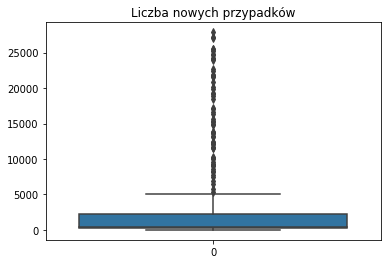

In [78]:
# plt.figure(figsize=(15,40))
sns.boxplot(data=df["Nowe przypadki"])
plt.title("Liczba nowych przypadków")
plt.show()

Text(0.5, 1.0, 'Dobowa liczba testów')

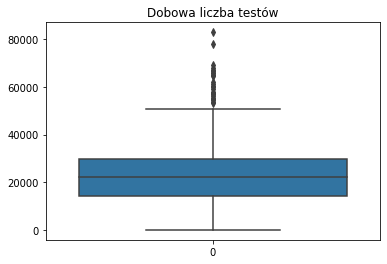

In [79]:
bp = sns.boxplot(data=df["Dobowa liczba wykonanych testów"])
plt.title("Dobowa liczba testów")

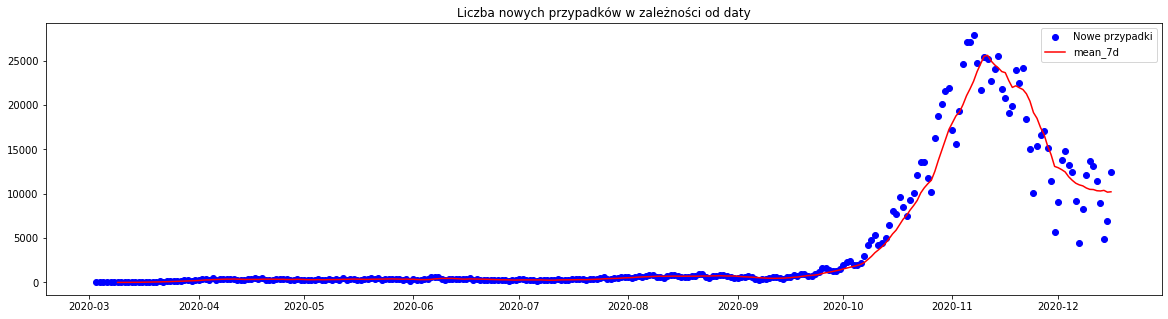

In [80]:
plt.figure(figsize=(20,5))
plt.plot(df["Data"], df["Nowe przypadki"],'bo', label="Nowe przypadki")
plt.plot(df_7d["Data"], df_7d["Nowe przypadki"],'r-', label="mean_7d")
plt.legend()
plt.title("Liczba nowych przypadków w zależności od daty")
plt.show()

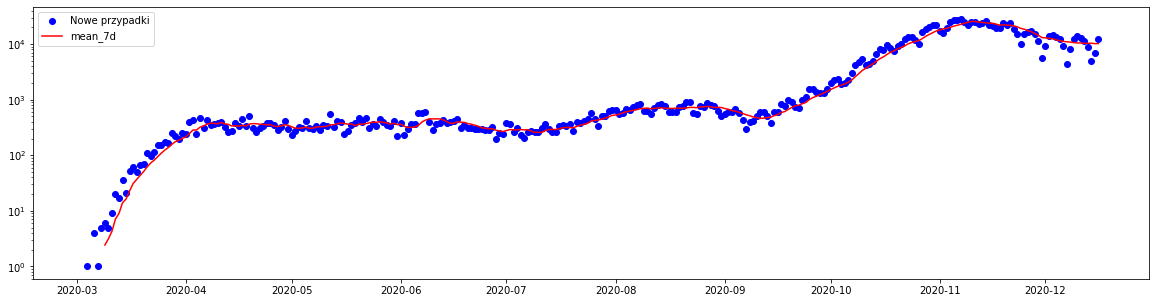

In [68]:
plt.figure(figsize=(20,5))
plt.semilogy(df["Data"], df["Nowe przypadki"],'bo', label="Nowe przypadki")
plt.semilogy(df_7d["Data"], df_7d["Nowe przypadki"],'r-', label="mean_7d")
plt.legend()
plt.show()

Dwa powyższe wykresy przestawiają dobową liczbę nowych przypadków. Wynika z nich jednoznacznie, że po uzyskaniu maksimum "1 fali" pandemii w kwietniu '20 nigdy się ona nie skończyła i trwała na podobnym poziomie przyrostów do pażdzienika '20, gdzie efekt "2 fali" trwającej w sąsiednich krajach spowodował przyrost przypadków także w Polsce. Ta druga fala ustąpiła po szczycie w 11.11, ale po jej zejściu w grudniu '20 osiągnięto nowy wstały poziom dziennych przyrostów w okolicach 10'000, który będzie etapem startowym dla prognozowanej na wiosnę '21 "3 fali" pandemii w krajach UE.

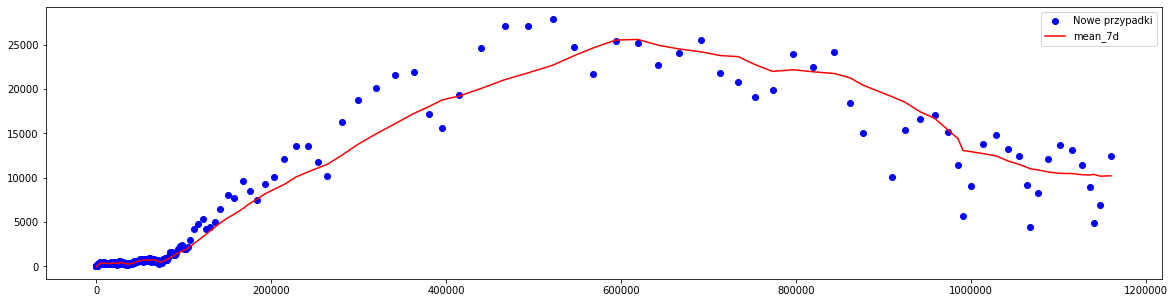

In [69]:
plt.figure(figsize=(20,5))
plt.plot(df["Suma potwierdzonych przypadków"], df["Nowe przypadki"],'bo', label="Nowe przypadki")
plt.plot(df["Suma potwierdzonych przypadków"][6:], df_7d["Nowe przypadki"],'r-', label="mean_7d")
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

Wykres nowych przypadków od liczny potwierdzonych przypadków. Pokazuje różnice dynami przyrostów "2 fali" względem "1 fali", która to jest ściśnięta po lewym dolnym rogu wykresu.

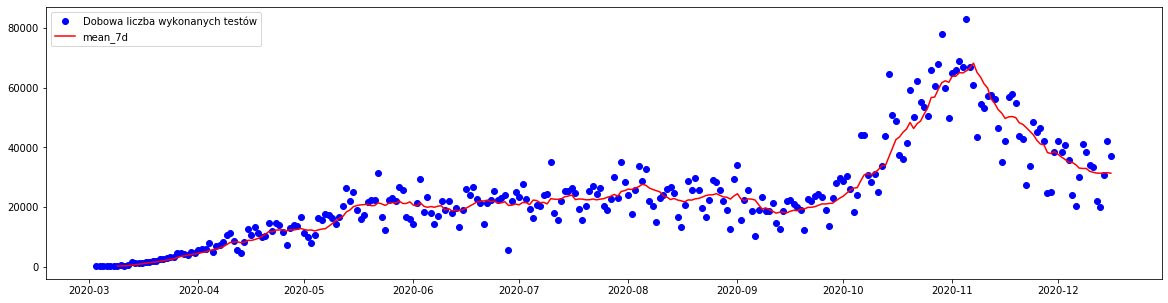

In [70]:
plt.figure(figsize=(20,5))
plt.plot(df["Data"], df["Dobowa liczba wykonanych testów"],'bo', label="Dobowa liczba wykonanych testów")
plt.plot(df_7d["Data"], df_7d["Dobowa liczba wykonanych testów"],'r-', label="mean_7d")
plt.legend()
plt.show()

Liczba dobowo wyonywanych testów to Polsce temat dość kontrowersyjny. Do prawidłowego obrazowania pandemii należy oprócz ludzi chorych badać też populację teoretycznie zdrową, ale mogącą potencjalnie być bezojawywymi chorymi, np. poprzez potwierdzony kontakt z osobą chorą. Tymczasem dalej panuje przekonanie, zarówno wśród obywateli, jak i lekarzy zlecających badania, że tylko osoby z potwierdzonymi objawami należy szczepić. Generuje to nieprawidłowy obraz pandmii na terenie naszego kraju i unimożliwia jakiekolwiek śledzenie powstawania ognisk epidemicznych.

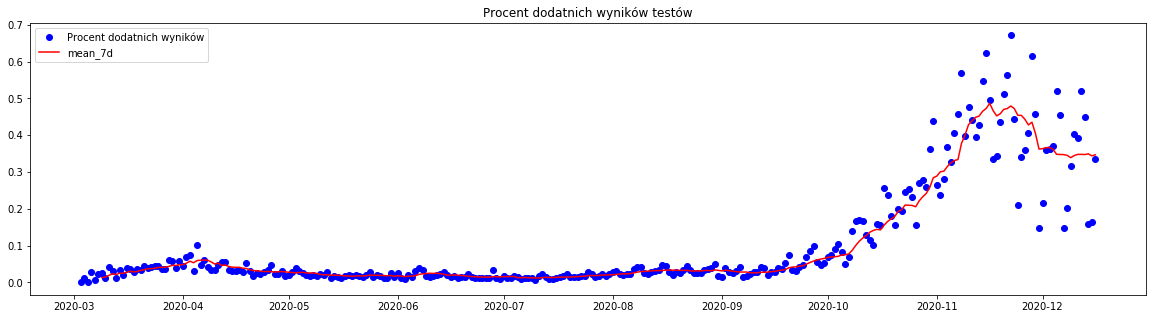

In [81]:
plt.figure(figsize=(20,5))
plt.plot(df["Data"], df["Procent dodatnich wyników"],'bo', label="Procent dodatnich wyników")
plt.plot(df_7d["Data"], df_7d["Procent dodatnich wyników"],'r-', label="mean_7d")
plt.legend()
plt.title("Procent dodatnich wyników testów")
plt.show()

Pokłosiem podejścia polaków do testowania, jest wysoki odsetek dodatnich wyników testów. Dopóki był on poniżej 10% (idyllą byłoby poniżej 1%) to znajdujemy 90% chorych w całej populacji. Niestety w listopadzie '20 współczynnik ten dobił do 50% co oznacza, że 50% chorych tego dnia nie wykonała testu i nie została zarejestrowana w systemie. Generuje to wiele problemów - od wspomnianego wcześniej ukrycia ognisk epidemicznych, po niedoszacowanie liczby ozdrowieńców czy też wysoki odsetek śmierteleności, który w Polsce wynosi 2-3%, podczas gdy w innych krajach skrupulatniej testujących wynosi on blizej 1%.

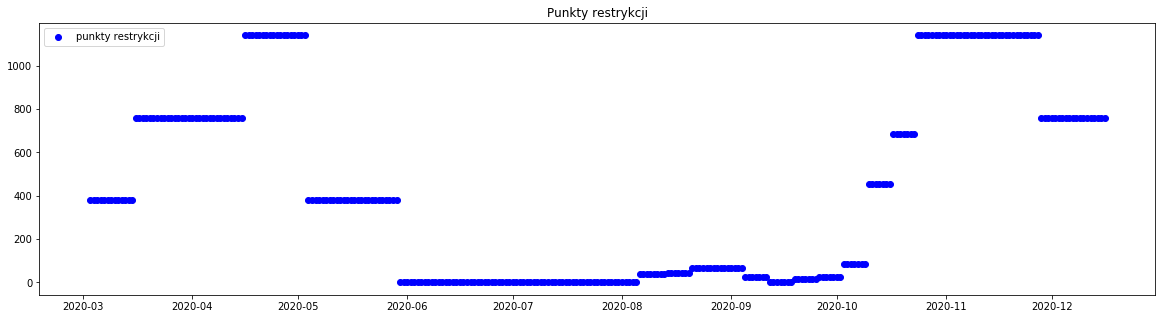

In [83]:
plt.figure(figsize=(20,5))
plt.plot(df["Data"], df["punkty restrykcji"],'bo', label="punkty restrykcji")
plt.legend()
plt.title("Punkty restrykcji")
plt.show()

Na powyższym wykresie przestawiamy przygotowany przez nas eksperymetlany współczynnik restrykcji na terenie kraju. Widać na nim dobrze, jak po początkowej panice związanej z nieznajomością choroby obostrzenia zostały praktycznie zdjęte na okres letni, a następnie nagłe wprowadzanie coraz to większej liczby powiatów do stref żółtych i czerwonych w związku z przyrostem zarażeń z początkiem października.

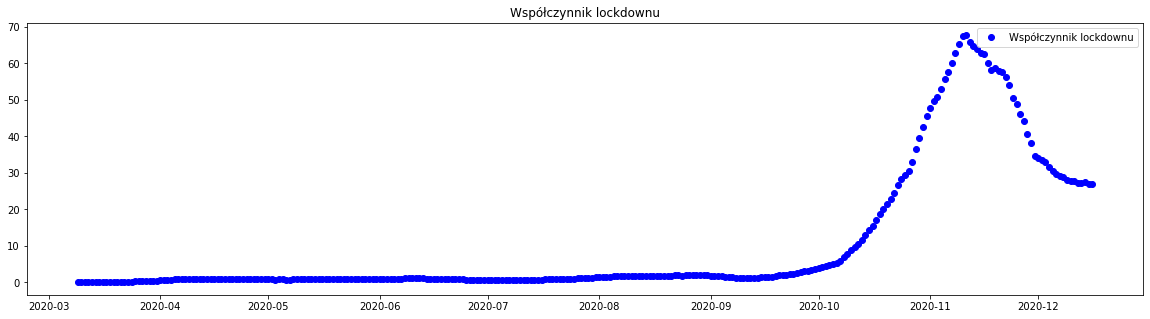

In [84]:
plt.figure(figsize=(20,5))
plt.plot(df_7d["Data"], df_7d["Współczynnik lockdownu"],'bo', label="Współczynnik lockdownu")
plt.legend()
plt.title("Współczynnik lockdownu")
plt.show()

Przedstawiony przez premiera Polski model prowadzania obostrzeń w zależności od ilosci zakażeń na 100tyś mieszkańców zobrazowany jest na powyższym wykresie. W momenie przekroczenia wartości 70 w średnim wyniku tygodniowym planowane było wprowadzenie narodowej kwarantanny (via: https://www.medexpress.pl/uploads/2020/11/od7-480x243.jpg). Widać na nim dość ostry spadek w momencie, kiedy niemalże przekroczyliśmy wartość 70, co w ostatniej chwili pozwoliło na uniknięcie całkowitego zamknięcia kraju. W grudniu wartości oscylują w okolicy 40, co zgodnie z pierwszymi informacjami powinno prowadzić do powrotu do stref żółtych i czerwonych, co również można było zauważyć poprzez chwilowe odmrożenie działania centrów handlowych w całej Polsce.

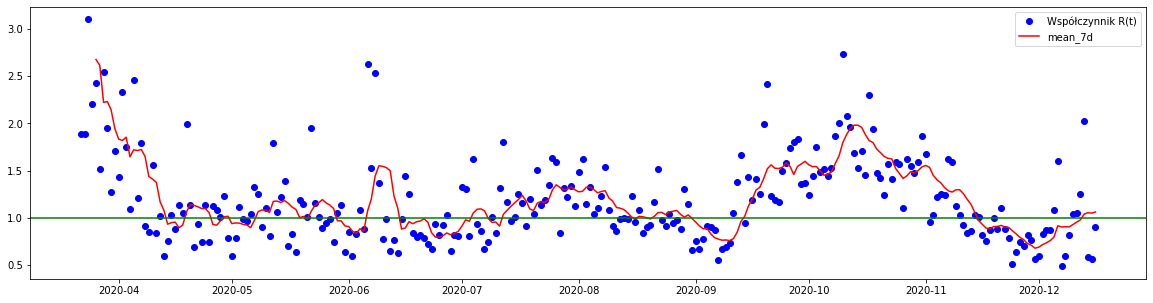

In [74]:
plt.figure(figsize=(20,5))
plt.plot(df_7d["Data"][13:], df_7d["Współczynnik R_t"][13:],'bo', label="Współczynnik R(t)")
plt.plot(df_14d["Data"][11:], df_14d["Współczynnik R_t"][11:],'r-', label="mean_7d")
plt.axhline(1, color = 'g', linestyle = '-')
plt.legend()
plt.show()

Poniższy wykres prezentuje zależność współczynnika reprodukcji, informującego o aktualnym stanie epidemii, od liczby punktów restrykcji, czyli miary wporwadzonych obostrzeń. Co można zaobserować, to fakt, że wprowadzane obostrzenia, nie idealnie, ale pokrywały się z wzrastającym współczynnikiem reprodukcji. Uwagą w tym miejscu może być zauważalnie opóźniona reakcja na jesieni (10-2020), kiedy to pomimo współczynnika reprodukcji zauważalnie powyżej 1.0 (linia zielona, czyli 1 osoba zarażona zarażała średnio więcej niż 1 osobę, co było przyczyną rozwoju pandemii), obostrzenia zostały wprowadzone z ok. 2-3 tygodniowym opóźnieniem. Przy wzrastającym w tym okresie poziomie restrykcji widoczny jest spadek współczynnika reprodukcji, co pozwoliło ustabilizować sytuację -- ponownie świadczy to o skuteczności obostrzeń, co jest potwierdzeniem naszej tezy.

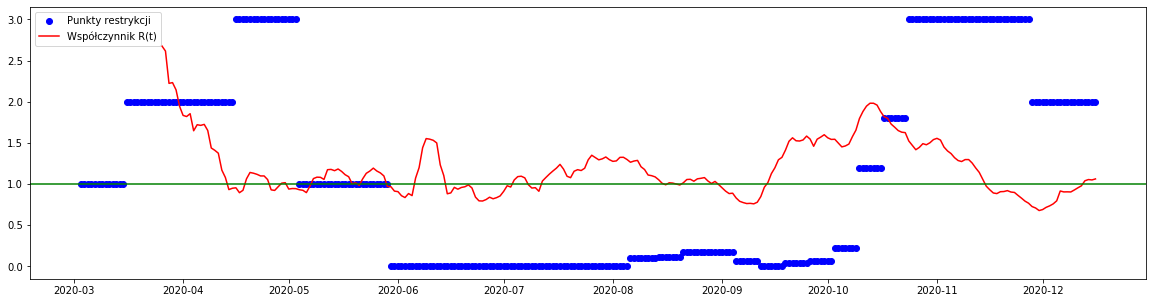

In [75]:
df.loc[:,'punkty restrykcji scaled'] = df['punkty restrykcji']/380
plt.figure(figsize=(20,5))
plt.plot(df["Data"], df["punkty restrykcji scaled"],'bo', label="Punkty restrykcji")
plt.plot(df_14d["Data"][11:], df_14d["Współczynnik R_t"][11:],'r-', label="Współczynnik R(t)")
plt.axhline(1, color = 'g', linestyle = '-')
plt.legend()
plt.show()

Pierwsza próba udowodnienia wpływu wprowadzanych restrykcji na reprodukcję wirusa w populacji.
W okresie marzec-maj '20 widać spadek współczynnika R(t) po stopniowym zaostrzeniu obostrzeń na terenie całego kraju.
Następnie okres wakacji w trakcie którego mimo braku restrykcji nie było wyrażnych wzrostów zachorowań.
Początek sierpnia, gdy zaczęto wprowadzać regionalne obostrzenia widań największy spadek reprodukcji, który niestety szybko odbił we wrześniu '20 gdy ucziowie wrócili do szkół, a dorośli do zakładów pracy. Po miesięcznej zwłoce, gdy wprowadzono bardzo szybko maksymalny poziom obostrzeń, liczna nowych zachorowań spadła adekwatnie.
gdy pod koniec listopada '20 otwarto galerie handlowe obserwuj się kolejny wzrost przypadków zakażeń, ze skutkiem, który poznamy w najbliższej przyszłości.